# Neste notebook serão analizados dados relacionados à ocupação hospitalar nos estados brasileiros devido à pandemia de COVID-19 

Os dados estão disponíveis na base do governo 
* Qual região do brasil mais utiliza o sistema público de saúde? 
* Qual região brasileira apresentou maior redução de mortes causadas por COVID-19 após o início das vacinações (Março/Abril 2021)? 
* Qual o avanço da COVID-19 no interior do Brasil? 
* Qual o percentual de ocupação hospitalar durante a pandemia? 


# Instalação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Leitura de dados

In [2]:
!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-16/esus-vepi.LeitoOcupacao_2021.csv
!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-18/esus-vepi.LeitoOcupacao_2022.csv 
!wget https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-18/esus-vepi.LeitoOcupacao_2020.csv

--2022-06-20 20:43:14--  https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-16/esus-vepi.LeitoOcupacao_2021.csv
Resolvendo s3.sa-east-1.amazonaws.com (s3.sa-east-1.amazonaws.com)... 52.95.165.100
Conectando-se a s3.sa-east-1.amazonaws.com (s3.sa-east-1.amazonaws.com)|52.95.165.100|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 166963859 (159M) [binary/octet-stream]
Salvando em: “esus-vepi.LeitoOcupacao_2021.csv”

esus-vepi.LeitoOcup 100%[===================>] 159,23M  3,00MB/s    em 67s     

2022-06-20 20:44:21 (2,37 MB/s) - “esus-vepi.LeitoOcupacao_2021.csv” salvo [166963859/166963859]

--2022-06-20 20:44:22--  https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/LEITOS/2022-06-18/esus-vepi.LeitoOcupacao_2022.csv
Resolvendo s3.sa-east-1.amazonaws.com (s3.sa-east-1.amazonaws.com)... 52.95.165.100
Conectando-se a s3.sa-east-1.amazonaws.com (s3.sa-east-1.amazonaws.com)|52.95.165.100|:443... conectado.
A requisição HTTP foi envia

In [37]:
leitos_file1 = pd.read_csv('./esus-vepi.LeitoOcupacao_2020.csv')  
leitos_file2 = pd.read_csv('./esus-vepi.LeitoOcupacao_2021.csv') 
leitos_file3 = pd.read_csv('./esus-vepi.LeitoOcupacao_2022.csv') 

/home/luciano/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Estudando as colunas disponíveis 
No código abaixo é extraído todas as colunas presentes no dataframe

In [38]:
leitos_file = pd.concat([leitos_file1, leitos_file2, leitos_file3])
leitos_file

,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,0,p5Ez41Zu6B,2020-04-14T03:00:00.000Z,2303167,0.0,0.0,0.0,0.0,NaN,NaN,...,aplicacao-web,_User$auVMjEVEVz,Santa Catarina,Itapema,Santa Catarina,Itapema,True,False,2020-04-15T13:44:30.085Z,2020-04-16T13:56:13.656Z
1,1,eUOMsSt7T7,2020-04-15T03:00:00.000Z,5935377\t,1.0,0.0,0.0,0.0,NaN,NaN,...,parse-cloud,_User$WBa5nfe9P9,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2020-04-15T13:50:47.256Z,2020-08-01T20:08:13.116Z
2,2,QaG4oIBrMa,2020-04-15T14:57:16.255Z,0012599,15.0,1.0,3.0,2.0,NaN,NaN,...,parse-cloud,_User$6oxZQHBPQ7,Rio de Janeiro,Niterói,Rio de Janeiro,Niterói,False,False,2020-04-15T15:20:57.033Z,2020-08-01T20:02:12.729Z
3,3,ifya31F3ZF,2020-03-24T03:00:00.000Z,2562871,9.0,0.0,1.0,0.0,NaN,NaN,...,parse-cloud,_User$fhufIbmR9C,Ceará,Várzea Alegre,Ceará,Várzea Alegre,False,False,2020-04-15T16:58:32.839Z,2020-08-01T21:40:37.624Z
4,4,dkurDhelx9,2020-04-01T03:00:00.000Z,2252228,26.0,0.0,1.0,0.0,NaN,NaN,...,parse-cloud,_User$tkAdHTNhC9,Rio Grande do Sul,Encantado,Rio Grande do Sul,Encantado,False,False,2020-04-15T17:02:53.877Z,2020-08-01T21:37:53.664Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203020,1502864,DGtsFDtwD2,2022-06-18T03:00:15.369Z,0004731,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$GS6PEaSxZe,Bahia,Salvador,Bahia,Salvador,False,False,2022-06-18T20:28:38.422Z,2022-06-18T20:28:38.422Z
203021,1502865,IStgYrDekM,2022-06-18T03:00:53.389Z,2796384,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$tmKh5FzPxo,Minas Gerais,Campos Gerais,Minas Gerais,Campos Gerais,False,False,2022-06-18T20:48:10.390Z,2022-06-18T20:48:10.390Z
203022,1502866,F7iHdEXgLp,2022-06-18T03:00:28.756Z,2167727,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$mdfZJNHULP,Minas Gerais,Poço Fundo,Minas Gerais,Poço Fundo,False,False,2022-06-18T20:52:45.835Z,2022-06-18T20:52:45.835Z
203023,1502867,zkmeBoehIy,2022-06-18T03:00:15.888Z,2439360,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$sNAX4aRCMY,Paraná,Apucarana,Paraná,Apucarana,False,False,2022-06-18T20:53:55.203Z,2022-06-18T20:53:55.203Z


In [39]:
leitos_file.columns.values

array(['Unnamed: 0', '_id', 'dataNotificacao', 'cnes',
       'ocupacaoSuspeitoCli', 'ocupacaoSuspeitoUti',
       'ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti',
       'ocupacaoCovidUti', 'ocupacaoCovidCli', 'ocupacaoHospitalarUti',
       'ocupacaoHospitalarCli', 'saidaSuspeitaObitos',
       'saidaSuspeitaAltas', 'saidaConfirmadaObitos',
       'saidaConfirmadaAltas', 'origem', '_p_usuario',
       'estadoNotificacao', 'municipioNotificacao', 'estado', 'municipio',
       'excluido', 'validado', '_created_at', '_updated_at'], dtype=object)

O próximo passo consistirá em limpar algumas colunas que são desnecessárias para nossas analises


In [40]:
to_drop = ['Unnamed: 0','cnes','_p_usuario','_created_at','_updated_at','origem','excluido','validado','estado','municipio']
leitos_file.drop(to_drop, inplace=True, axis=1)

# Tipos de dados
Outro passo interessante na etapa de análise dos dados brutos consiste em análisar o tipo dos dados que estão sendo tratados

In [41]:
leitos_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502709 entries, 0 to 203024
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   _id                    1502709 non-null  object 
 1   dataNotificacao        1502709 non-null  object 
 2   ocupacaoSuspeitoCli    1014964 non-null  float64
 3   ocupacaoSuspeitoUti    1014964 non-null  float64
 4   ocupacaoConfirmadoCli  1014965 non-null  float64
 5   ocupacaoConfirmadoUti  1014965 non-null  float64
 6   ocupacaoCovidUti       494576 non-null   float64
 7   ocupacaoCovidCli       494576 non-null   float64
 8   ocupacaoHospitalarUti  494576 non-null   float64
 9   ocupacaoHospitalarCli  494576 non-null   float64
 10  saidaSuspeitaObitos    1502593 non-null  float64
 11  saidaSuspeitaAltas     1502605 non-null  float64
 12  saidaConfirmadaObitos  1502697 non-null  float64
 13  saidaConfirmadaAltas   1502696 non-null  float64
 14  estadoNotificacao  

In [42]:
leitos_file.dtypes

_id                       object
dataNotificacao           object
ocupacaoSuspeitoCli      float64
ocupacaoSuspeitoUti      float64
ocupacaoConfirmadoCli    float64
ocupacaoConfirmadoUti    float64
ocupacaoCovidUti         float64
ocupacaoCovidCli         float64
ocupacaoHospitalarUti    float64
ocupacaoHospitalarCli    float64
saidaSuspeitaObitos      float64
saidaSuspeitaAltas       float64
saidaConfirmadaObitos    float64
saidaConfirmadaAltas     float64
estadoNotificacao         object
municipioNotificacao      object
dtype: object

# Indexação
Outro passo para tornar os dados mais faceis de serem manipulados consiste em indexá-los  

Para isso selecionamos uma coluna de forma a torná-la única para cada entrada do dataframe

In [43]:
leitos_file['_id'].is_unique

True

# Verificação de valores faltantes 

Identificação de valores nulos nas colunas

In [44]:
leitos_file.isnull().any()

_id                      False
dataNotificacao          False
ocupacaoSuspeitoCli       True
ocupacaoSuspeitoUti       True
ocupacaoConfirmadoCli     True
ocupacaoConfirmadoUti     True
ocupacaoCovidUti          True
ocupacaoCovidCli          True
ocupacaoHospitalarUti     True
ocupacaoHospitalarCli     True
saidaSuspeitaObitos       True
saidaSuspeitaAltas        True
saidaConfirmadaObitos     True
saidaConfirmadaAltas      True
estadoNotificacao        False
municipioNotificacao     False
dtype: bool

Contagem de valores nulos nas colunas

In [45]:
leitos_file.isnull().sum()

_id                            0
dataNotificacao                0
ocupacaoSuspeitoCli       487745
ocupacaoSuspeitoUti       487745
ocupacaoConfirmadoCli     487744
ocupacaoConfirmadoUti     487744
ocupacaoCovidUti         1008133
ocupacaoCovidCli         1008133
ocupacaoHospitalarUti    1008133
ocupacaoHospitalarCli    1008133
saidaSuspeitaObitos          116
saidaSuspeitaAltas           104
saidaConfirmadaObitos         12
saidaConfirmadaAltas          13
estadoNotificacao              0
municipioNotificacao           0
dtype: int64

O próximo passo consiste em remover valores nulos do dataframe

In [46]:
newDF = leitos_file.dropna()

Após eliminar os valores nulos, é necessário verificar se de fato foram eliminados


In [47]:
newDF.isnull().sum()

_id                      0
dataNotificacao          0
ocupacaoSuspeitoCli      0
ocupacaoSuspeitoUti      0
ocupacaoConfirmadoCli    0
ocupacaoConfirmadoUti    0
ocupacaoCovidUti         0
ocupacaoCovidCli         0
ocupacaoHospitalarUti    0
ocupacaoHospitalarCli    0
saidaSuspeitaObitos      0
saidaSuspeitaAltas       0
saidaConfirmadaObitos    0
saidaConfirmadaAltas     0
estadoNotificacao        0
municipioNotificacao     0
dtype: int64

In [48]:
newDF

,_id,dataNotificacao,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,estadoNotificacao,municipioNotificacao
14327,yfWHxxrddG,2020-04-01T03:00:00.000Z,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Minas Gerais,João Pinheiro
55820,Ov18VM6WZq,2020-06-03T03:00:00.000Z,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Minas Gerais,João Pinheiro
103291,RvzIepH9ni,2020-07-01T03:00:00.000Z,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,Ceará,Jaguaretama
104964,v5Y8Yzb7Wg,2020-07-02T03:00:00.000Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,Ceará,Jaguaretama
113207,X7uHWphXmO,2020-07-03T03:00:00.000Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,Ceará,Jaguaretama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554767,vcOndp6Se7,2021-09-12T03:00:00.000Z,22.0,27.0,22.0,20.0,19.0,23.0,26.0,25.0,0.0,0.0,1.0,2.0,Rio de Janeiro,Campos dos Goytacazes
554785,ts0F8D9j2G,2021-09-12T03:00:00.000Z,49.0,8.0,2.0,2.0,3.0,2.0,9.0,35.0,0.0,0.0,0.0,0.0,Rio de Janeiro,Itaguaí
554861,Q7JlCyEeU1,2021-09-12T03:00:00.000Z,113.0,31.0,0.0,2.0,2.0,0.0,32.0,95.0,0.0,0.0,0.0,0.0,Santa Catarina,Lages
556144,vWSkI7foyr,2021-09-13T03:00:00.000Z,12.0,2.0,4.0,2.0,3.0,2.0,2.0,12.0,1.0,0.0,0.0,0.0,Minas Gerais,São Gotardo


In [49]:
newDF.sort_values(['estadoNotificacao'])

,_id,dataNotificacao,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,estadoNotificacao,municipioNotificacao
545092,RPbh5pf3Z5,2021-09-07T05:00:00.000Z,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Acre,Marechal Thaumaturgo
546785,Mkda8o9gVK,2021-09-08T04:00:00.000Z,25.0,6.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,Amazonas,São Gabriel da Cachoeira
549365,bg49qzf0AU,2021-09-09T04:00:00.000Z,23.0,5.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,Amazonas,São Gabriel da Cachoeira
551687,fC3AzA7yRZ,2021-09-10T04:00:00.000Z,18.0,7.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,Amazonas,São Gabriel da Cachoeira
526962,FL7mfLNZQg,2021-08-28T03:00:00.000Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bahia,Salvador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530689,pHqteskz5O,2021-08-30T03:00:00.000Z,181.0,18.0,8.0,6.0,6.0,9.0,18.0,181.0,0.0,0.0,0.0,0.0,Tocantins,Araguaína
552012,dXBqo8wHNU,2021-09-10T03:00:00.000Z,169.0,20.0,2.0,11.0,11.0,2.0,20.0,169.0,0.0,0.0,0.0,0.0,Tocantins,Araguaína
530675,FwFvFnHPQz,2021-08-29T03:00:00.000Z,161.0,18.0,8.0,7.0,7.0,9.0,18.0,161.0,0.0,0.0,0.0,0.0,Tocantins,Araguaína
549401,nPq9qAuFOP,2021-09-09T03:00:00.000Z,162.0,20.0,3.0,9.0,11.0,2.0,20.0,173.0,0.0,0.0,0.0,1.0,Tocantins,Araguaína


Uma outra forma de ordenar o dataframe de forma a tornar sua aparencia mais intuitiva de acordo com o objetivo das análises é modificar a ordem dos atributos.  
O df será organizado de acordo com sua localização

In [50]:
first_column = newDF.pop('estadoNotificacao')
second_column = newDF.pop('municipioNotificacao') 

  
newDF.insert(0, 'estadoNotificacao', first_column) 
newDF.insert(1, 'municipioNotificacao', first_column)
newDF

,estadoNotificacao,municipioNotificacao,_id,dataNotificacao,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
14327,Minas Gerais,Minas Gerais,yfWHxxrddG,2020-04-01T03:00:00.000Z,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55820,Minas Gerais,Minas Gerais,Ov18VM6WZq,2020-06-03T03:00:00.000Z,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103291,Ceará,Ceará,RvzIepH9ni,2020-07-01T03:00:00.000Z,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0
104964,Ceará,Ceará,v5Y8Yzb7Wg,2020-07-02T03:00:00.000Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
113207,Ceará,Ceará,X7uHWphXmO,2020-07-03T03:00:00.000Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554767,Rio de Janeiro,Rio de Janeiro,vcOndp6Se7,2021-09-12T03:00:00.000Z,22.0,27.0,22.0,20.0,19.0,23.0,26.0,25.0,0.0,0.0,1.0,2.0
554785,Rio de Janeiro,Rio de Janeiro,ts0F8D9j2G,2021-09-12T03:00:00.000Z,49.0,8.0,2.0,2.0,3.0,2.0,9.0,35.0,0.0,0.0,0.0,0.0
554861,Santa Catarina,Santa Catarina,Q7JlCyEeU1,2021-09-12T03:00:00.000Z,113.0,31.0,0.0,2.0,2.0,0.0,32.0,95.0,0.0,0.0,0.0,0.0
556144,Minas Gerais,Minas Gerais,vWSkI7foyr,2021-09-13T03:00:00.000Z,12.0,2.0,4.0,2.0,3.0,2.0,2.0,12.0,1.0,0.0,0.0,0.0


É possível também modificar a ordem como os dados aparecem.  
No código abaixo o dataframe é organizado de forma que as entradas são ordenadas em ordem alfabética usando como chave o nome do estado.

In [51]:
newDF.sort_values(['estadoNotificacao'])

,estadoNotificacao,municipioNotificacao,_id,dataNotificacao,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,ocupacaoHospitalarUti,ocupacaoHospitalarCli,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
545092,Acre,Acre,RPbh5pf3Z5,2021-09-07T05:00:00.000Z,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
546785,Amazonas,Amazonas,Mkda8o9gVK,2021-09-08T04:00:00.000Z,25.0,6.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0
549365,Amazonas,Amazonas,bg49qzf0AU,2021-09-09T04:00:00.000Z,23.0,5.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0
551687,Amazonas,Amazonas,fC3AzA7yRZ,2021-09-10T04:00:00.000Z,18.0,7.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
526962,Bahia,Bahia,FL7mfLNZQg,2021-08-28T03:00:00.000Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530689,Tocantins,Tocantins,pHqteskz5O,2021-08-30T03:00:00.000Z,181.0,18.0,8.0,6.0,6.0,9.0,18.0,181.0,0.0,0.0,0.0,0.0
552012,Tocantins,Tocantins,dXBqo8wHNU,2021-09-10T03:00:00.000Z,169.0,20.0,2.0,11.0,11.0,2.0,20.0,169.0,0.0,0.0,0.0,0.0
530675,Tocantins,Tocantins,FwFvFnHPQz,2021-08-29T03:00:00.000Z,161.0,18.0,8.0,7.0,7.0,9.0,18.0,161.0,0.0,0.0,0.0,0.0
549401,Tocantins,Tocantins,nPq9qAuFOP,2021-09-09T03:00:00.000Z,162.0,20.0,3.0,9.0,11.0,2.0,20.0,173.0,0.0,0.0,0.0,1.0


Nos dados acima, as duas sub-categórias que dividem as demais são CLi e COVID. Podemos formatar os dados exibindo apenas o total delas. 

In [52]:
newDfTotal = newDF    

newDfTotal['totalOcupacaoSuspeita'] = newDfTotal['ocupacaoSuspeitoCli'] + newDfTotal['ocupacaoSuspeitoUti']
newDfTotal['totalOcupacaoConfirmados'] = newDfTotal['ocupacaoConfirmadoCli'] + newDfTotal['ocupacaoConfirmadoUti']
newDfTotal['totalOcupacaoCovid'] = newDfTotal['ocupacaoCovidCli'] + newDfTotal['ocupacaoCovidUti']
newDfTotal['totalOcupacaoHospitalar'] = newDfTotal['ocupacaoHospitalarUti'] + newDfTotal['ocupacaoHospitalarCli']


<ipython-input-52-6c8b406a3e4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDfTotal['totalOcupacaoSuspeita'] = newDfTotal['ocupacaoSuspeitoCli'] + newDfTotal['ocupacaoSuspeitoUti']
<ipython-input-52-6c8b406a3e4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDfTotal['totalOcupacaoConfirmados'] = newDfTotal['ocupacaoConfirmadoCli'] + newDfTotal['ocupacaoConfirmadoUti']
<ipython-input-52-6c8b406a3e4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Agora excluiremos do novo dataframe compacto os atributos individuais.  
Caso seja necessário, no dataframe newDF ainda estão os atributos individuais.  
Cada um desses serão uteis para diferentes análises. 

In [53]:

excluded_columns = ['ocupacaoSuspeitoCli', 'ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti','ocupacaoCovidCli','ocupacaoCovidUti','ocupacaoHospitalarUti','ocupacaoHospitalarCli' ]

for i in excluded_columns: 
  newDfTotal.pop(i)  

newDfTotal

,estadoNotificacao,municipioNotificacao,_id,dataNotificacao,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,totalOcupacaoSuspeita,totalOcupacaoConfirmados,totalOcupacaoCovid,totalOcupacaoHospitalar
14327,Minas Gerais,Minas Gerais,yfWHxxrddG,2020-04-01T03:00:00.000Z,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
55820,Minas Gerais,Minas Gerais,Ov18VM6WZq,2020-06-03T03:00:00.000Z,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
103291,Ceará,Ceará,RvzIepH9ni,2020-07-01T03:00:00.000Z,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
104964,Ceará,Ceará,v5Y8Yzb7Wg,2020-07-02T03:00:00.000Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
113207,Ceará,Ceará,X7uHWphXmO,2020-07-03T03:00:00.000Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
554767,Rio de Janeiro,Rio de Janeiro,vcOndp6Se7,2021-09-12T03:00:00.000Z,0.0,0.0,1.0,2.0,49.0,42.0,42.0,51.0
554785,Rio de Janeiro,Rio de Janeiro,ts0F8D9j2G,2021-09-12T03:00:00.000Z,0.0,0.0,0.0,0.0,57.0,4.0,5.0,44.0
554861,Santa Catarina,Santa Catarina,Q7JlCyEeU1,2021-09-12T03:00:00.000Z,0.0,0.0,0.0,0.0,144.0,2.0,2.0,127.0
556144,Minas Gerais,Minas Gerais,vWSkI7foyr,2021-09-13T03:00:00.000Z,1.0,0.0,0.0,0.0,14.0,6.0,5.0,14.0


# Estatística Descritiva 
Nessa etapa usaremos o método describe para descrever o comportamentos dos atributos mais importantes.

In [54]:
newDF.describe()

,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,totalOcupacaoSuspeita,totalOcupacaoConfirmados,totalOcupacaoCovid,totalOcupacaoHospitalar
count,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000
mean,0.057808,0.273233,0.394117,1.067467,80.035270,18.633397,16.531977,24.591395
std,0.283258,1.388038,1.777825,2.113782,117.554275,31.905416,24.101407,49.224429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,36.000000,8.000000,8.000000,10.000000
75%,0.000000,0.000000,0.000000,1.000000,83.000000,22.000000,22.000000,26.000000
max,4.000000,80.000000,129.000000,24.000000,673.000000,625.000000,175.000000,642.000000


In [ ]:
newDfTotal.describe()

,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,totalOcupacaoSuspeita,totalOcupacaoConfirmados,totalOcupacaoCovid,totalOcupacaoHospitalar
count,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000
mean,0.057589,0.276786,0.386607,1.078869,81.043304,18.695387,16.507738,24.588095
std,0.283156,1.398933,1.787639,2.125130,118.260590,32.133066,24.236634,49.474187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,36.500000,8.000000,8.000000,10.000000
75%,0.000000,0.000000,0.000000,1.000000,84.000000,22.000000,21.000000,26.000000
max,4.000000,80.000000,129.000000,24.000000,673.000000,625.000000,175.000000,642.000000


# Visualização

## Ocupação hospitalar por Estado

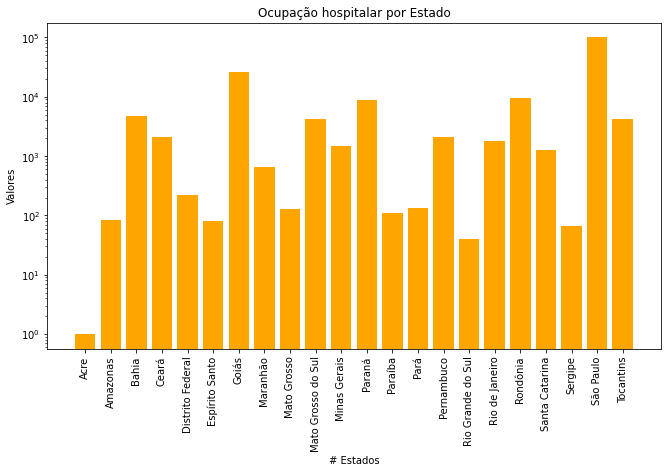

In [85]:
def occupation_per_state(field,title):
    country_group_sum = newDfTotal.groupby('estadoNotificacao')[field].sum()

    plt.figure(figsize =(11, 6))
    plt.bar(country_group_sum.index, country_group_sum.values, color = 'orange')
    plt.ylabel("Valores")
    plt.xlabel("# Estados")
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.yscale('log')
    plt.show()

occupation_per_state('totalOcupacaoHospitalar',"Ocupação hospitalar por Estado")

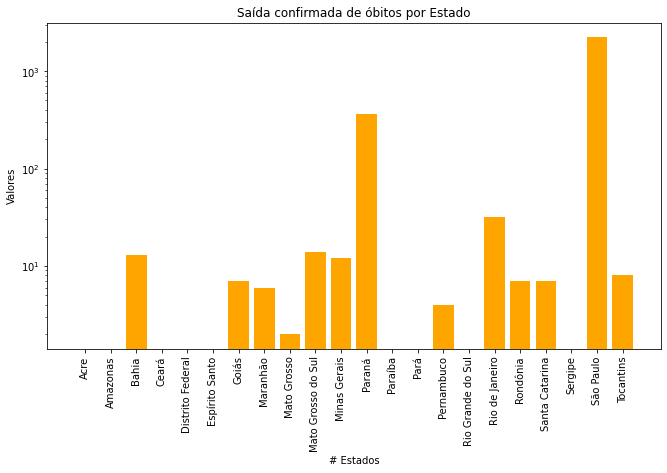

In [86]:
occupation_per_state('saidaConfirmadaObitos',"Saída confirmada de óbitos por Estado")

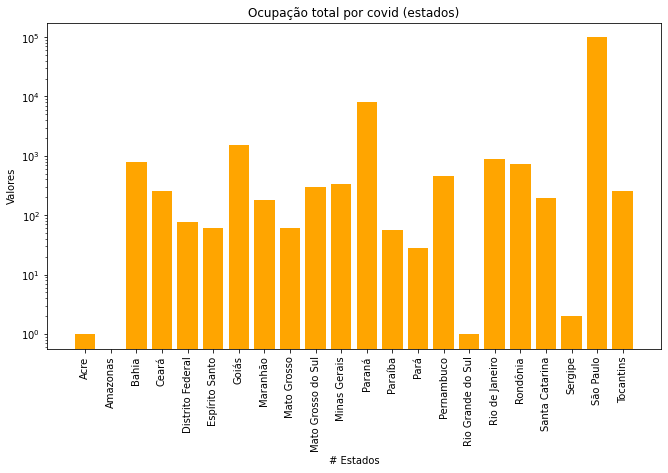

In [87]:
occupation_per_state('totalOcupacaoCovid',"Ocupação total por covid (estados)")

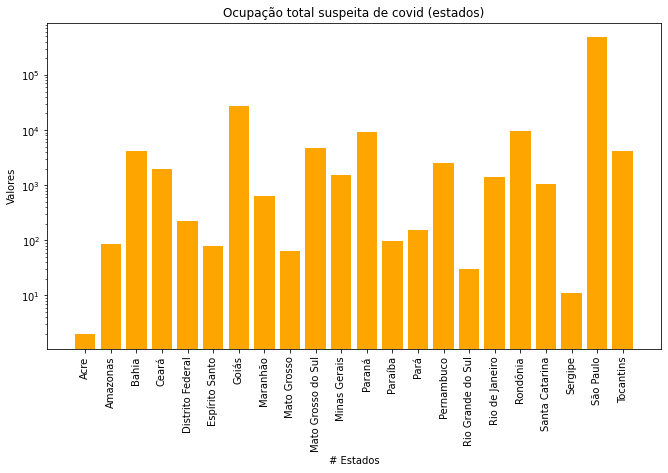

In [88]:
occupation_per_state('totalOcupacaoSuspeita',"Ocupação total suspeita de covid (estados)")